In [2]:
import pandas as pd
import os
from pathlib import Path
import ast
import matplotlib.pyplot as plt


## Data input and Export OPMode in Running columns

In [3]:
rawDataPath = Path("./raw_data")

In [4]:
abff0  = pd.read_csv(rawDataPath/'abff_0.csv')
adff1  = pd.read_csv(rawDataPath/'abff_1.csv')
adff2  = pd.read_csv(rawDataPath/'abff_2.csv')
ins    = pd.read_csv(rawDataPath/'INS.csv')
raw_df = pd.read_csv(rawDataPath/'order_df_20251218.csv')

In [5]:
raw_df['OPMode'] = raw_df['Running'].apply(
    lambda x: ast.literal_eval(x).get('OPMode')
)

OPMode
DCP    4233
DTC    1698
ESB    1288
NAV    1049
HAD     174
DBF      93
COR      64
DTO      43
DLM      12
IDL       7
NOR       1
Name: count, dtype: int64


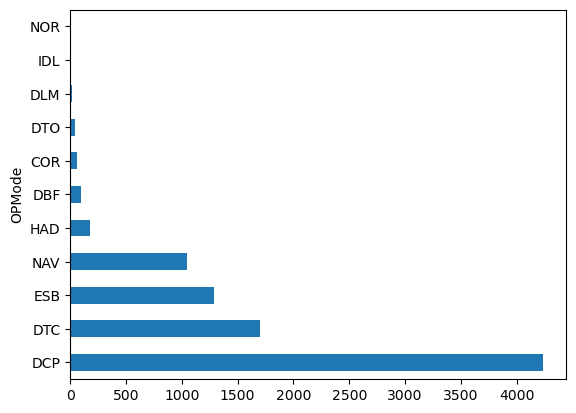

In [6]:
print(raw_df['OPMode'].value_counts())
raw_df['OPMode'].value_counts().plot(kind='barh');

In [7]:
maindf = raw_df.loc[
    raw_df['OPMode'] == 'NAV',
    ['UnitNumber', 'FlagChangeTime', 'WaitReportTime']
].copy()
maindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1049 entries, 0 to 8657
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   UnitNumber      1049 non-null   object
 1   FlagChangeTime  1049 non-null   int64 
 2   WaitReportTime  1049 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 32.8+ KB


In [8]:
raw_df['FlagChangeTime'].head(3)

0    1766011673
1    1766011466
2    1766011039
Name: FlagChangeTime, dtype: int64

In [9]:
maindf['FlagChangeTime'] = pd.to_datetime(raw_df['FlagChangeTime'], unit = 's', utc=True).dt.tz_convert('Asia/Shanghai')
maindf['WaitReportTime'] = pd.to_datetime(raw_df['WaitReportTime'], unit = 's', utc=True).dt.tz_convert('Asia/Shanghai')

In [66]:
maindf.info();
maindf.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 1049 entries, 0 to 8657
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype                        
---  ------          --------------  -----                        
 0   UnitNumber      1049 non-null   object                       
 1   FlagChangeTime  1049 non-null   datetime64[ns, Asia/Shanghai]
 2   WaitReportTime  1049 non-null   datetime64[ns, Asia/Shanghai]
dtypes: datetime64[ns, Asia/Shanghai](2), object(1)
memory usage: 32.8+ KB


,UnitNumber,FlagChangeTime,WaitReportTime
0,R2N0JU55,2025-12-18 06:47:53+08:00,2025-12-18 07:00:00+08:00
1,R2N0JU55,2025-12-18 06:44:26+08:00,2025-12-18 07:00:00+08:00
2,R2N0JU55,2025-12-18 06:37:19+08:00,2025-12-18 07:00:00+08:00


In [ ]:
# number of unique UnitNumber values (ignores NaN by default)
unique_count = maindf['UnitNumber'].nunique()
print("Unique UnitNumber count:", unique_count)


# frequency counts, sorted descending
counts = maindf['UnitNumber'].value_counts()
print(counts.head(20))   # top 20 most frequent UnitNumber values

Unique UnitNumber count: 610
UnitNumber
R2N5K920    161
R2N0JU55    142
R2N7D269     19
R2N0CL60     17
R2N3Z544     14
R2N8S802     12
R2N7P426      8
F8N0KUS9      7
F8N74P43      5
R2NJ1753      5
F8N1PEB4      4
D3NT2338      4
F8N0WXC7      4
D6N67540      4
F8N1FLH4      3
F8S26B73      3
F8N1ZAS6      3
F8N1PMY9      3
N8S01N61      3
R2N9G995      3
Name: count, dtype: int64


## Process INS data, and exclude the occurence on INS

In [10]:
ins.info()
ins.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100192 entries, 0 to 100191
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   UnitNumber     100192 non-null  object
 1   insff          100192 non-null  int64 
 2   inschangetime  100192 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


,UnitNumber,insff,inschangetime
0,R2N8R791,1,"1,765,980,606"
1,R2N8K651,1,"1,765,980,572"
2,R2N8R791,1,"1,765,980,577"


In [11]:
ins['INSTime'] = pd.to_datetime(ins['inschangetime'].str.replace(',', ''), unit = 's', utc=True).dt.tz_convert('Asia/Shanghai')
ins.head(3)

C:\Users\AnRaymon\AppData\Local\Temp\ipykernel_37508\4188856748.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  ins['INSTime'] = pd.to_datetime(ins['inschangetime'].str.replace(',', ''), unit = 's', utc=True).dt.tz_convert('Asia/Shanghai')


,UnitNumber,insff,inschangetime,INSTime
0,R2N8R791,1,"1,765,980,606",2025-12-17 22:10:06+08:00
1,R2N8K651,1,"1,765,980,572",2025-12-17 22:09:32+08:00
2,R2N8R791,1,"1,765,980,577",2025-12-17 22:09:37+08:00


* Rule 1: Match Ins to maindf, regardless of date

In [12]:
filtered_maindf1 = maindf[~maindf['UnitNumber'].isin(ins['UnitNumber'])].copy()
filtered_maindf1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 785 entries, 0 to 8657
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype                        
---  ------          --------------  -----                        
 0   UnitNumber      785 non-null    object                       
 1   FlagChangeTime  785 non-null    datetime64[ns, Asia/Shanghai]
 2   WaitReportTime  785 non-null    datetime64[ns, Asia/Shanghai]
dtypes: datetime64[ns, Asia/Shanghai](2), object(1)
memory usage: 24.5+ KB


In [13]:
# number of unique UnitNumber values (ignores NaN by default)
unique_count = filtered_maindf1['UnitNumber'].nunique()
print("Unique UnitNumber count:", unique_count)


# frequency counts, sorted descending
counts = filtered_maindf1['UnitNumber'].value_counts()
print(counts.head(10))   # top 20 most frequent UnitNumber values

Unique UnitNumber count: 419
UnitNumber
R2N5K920    161
R2N0JU55    142
R2N0CL60     17
R2N7P426      8
F8N0KUS9      7
D3NT2338      4
D6N67540      4
F8N0WXC7      4
F8N1PEB4      4
F8N1PMY9      3
Name: count, dtype: int64


* Rule 2 : Stricter rule ( same UnitNumber + Same day)

In [18]:
maindf['date'] = maindf['FlagChangeTime'].dt.date
ins['date'] = ins['INSTime'].dt.date

In [19]:
exclude_keys = set(zip(ins['UnitNumber'], ins['date']))
list(exclude_keys)[:5]

[('D6N55336', datetime.date(2025, 12, 18)),
 ('F8S21A91', datetime.date(2025, 12, 19)),
 ('R2NV8276', datetime.date(2025, 12, 19)),
 ('F8N97Z06', datetime.date(2025, 12, 18)),
 ('F8N52W74', datetime.date(2025, 12, 18))]

In [20]:
filtered_maindf2 = maindf[
    ~maindf.apply(lambda row: (row['UnitNumber'], row['date']) in exclude_keys, axis=1)].copy()

In [21]:
filtered_maindf2.info()

unique_count = filtered_maindf2['UnitNumber'].nunique()
print("Unique UnitNumber count:", unique_count)

counts = filtered_maindf2['UnitNumber'].value_counts()
print(counts.head(10))   # top 20 most frequent UnitNumber values

<class 'pandas.core.frame.DataFrame'>
Index: 791 entries, 0 to 8657
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype                        
---  ------          --------------  -----                        
 0   UnitNumber      791 non-null    object                       
 1   FlagChangeTime  791 non-null    datetime64[ns, Asia/Shanghai]
 2   WaitReportTime  791 non-null    datetime64[ns, Asia/Shanghai]
 3   date            791 non-null    object                       
dtypes: datetime64[ns, Asia/Shanghai](2), object(2)
memory usage: 30.9+ KB
Unique UnitNumber count: 425
UnitNumber
R2N5K920    161
R2N0JU55    142
R2N0CL60     17
R2N7P426      8
F8N0KUS9      7
F8N1PEB4      4
F8N0WXC7      4
D6N67540      4
D3NT2338      4
F8N1PMY9      3
Name: count, dtype: int64


In [22]:
filtered_maindf2.head(3)

,UnitNumber,FlagChangeTime,WaitReportTime,date
0,R2N0JU55,2025-12-18 06:47:53+08:00,2025-12-18 07:00:00+08:00,2025-12-18
1,R2N0JU55,2025-12-18 06:44:26+08:00,2025-12-18 07:00:00+08:00,2025-12-18
2,R2N0JU55,2025-12-18 06:37:19+08:00,2025-12-18 07:00:00+08:00,2025-12-18


## ABFF calculations

In [23]:
# combine abff_1 and abff_2
abff_signal = pd.concat([adff1, adff2], ignore_index=True)
abff_signal['Signal'] = "Yes"
abff_signal['SignalTime'] = pd.to_datetime(abff_signal['changetime'].str.replace(',', ''), unit = 's', utc=True).dt.tz_convert('Asia/Shanghai')

C:\Users\AnRaymon\AppData\Local\Temp\ipykernel_37508\2358013750.py:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  abff_signal['SignalTime'] = pd.to_datetime(abff_signal['changetime'].str.replace(',', ''), unit = 's', utc=True).dt.tz_convert('Asia/Shanghai')


In [24]:
abff_signal.info()

unique_count = abff_signal['UnitNumber'].nunique()
print("Unique UnitNumber count:", unique_count)

counts = abff_signal['UnitNumber'].value_counts()
print(counts.head(10))   # top 20 most frequent UnitNumber values

abff_signal.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249603 entries, 0 to 249602
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype                        
---  ------      --------------   -----                        
 0   UnitNumber  249603 non-null  object                       
 1   abff        249603 non-null  int64                        
 2   changetime  249603 non-null  object                       
 3   opmode      247745 non-null  object                       
 4   floor       247745 non-null  float64                      
 5   Signal      249603 non-null  object                       
 6   SignalTime  249603 non-null  datetime64[ns, Asia/Shanghai]
dtypes: datetime64[ns, Asia/Shanghai](1), float64(1), int64(1), object(4)
memory usage: 13.3+ MB
Unique UnitNumber count: 68059
UnitNumber
R2N1N964    598
R2N5W641    515
F8N1RYH8    512
R2N5K920    491
F8K08B04    487
F8N1GHX8    485
N8N02T61    475
R2N4R711    465
F8NF8932    462
D6N67629    461
Name: count, dt

,UnitNumber,abff,changetime,opmode,floor,Signal,SignalTime
0,F8N70Z30,1,"1,766,104,136",DCP,8.0,Yes,2025-12-19 08:28:56+08:00
1,F8N70Z30,1,"1,766,103,199",DCP,10.0,Yes,2025-12-19 08:13:19+08:00
2,F8N47Z91,1,"1,766,106,537",HAD,2.0,Yes,2025-12-19 09:08:57+08:00


In [25]:
abff_signal['opmode'].value_counts()

opmode
DCP    182622
NAV     24139
DTC     10978
ESB     10782
HAD      8986
COR      3048
DTO      2913
DBF      1777
DLM      1075
IDL       669
NOR       294
INS       188
PRK       121
ARO        66
REC        35
CHC        30
INI         6
ISC         4
LNS         3
PKS         3
PFO         2
ATT         1
EFO         1
OLD         1
ARD         1
Name: count, dtype: int64

In [26]:
abff0['neutralTime'] = pd.to_datetime(abff0['changetime'].str.replace(',', ''), unit = 's', utc=True).dt.tz_convert('Asia/Shanghai')

C:\Users\AnRaymon\AppData\Local\Temp\ipykernel_37508\3382487994.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  abff0['neutralTime'] = pd.to_datetime(abff0['changetime'].str.replace(',', ''), unit = 's', utc=True).dt.tz_convert('Asia/Shanghai')


In [27]:
# 1) inspect columns quickly
print("abff_signal columns:", abff_signal.columns.tolist())
print("abff0 columns:", abff0.columns.tolist())

abff_signal columns: ['UnitNumber', 'abff', 'changetime', 'opmode', 'floor', 'Signal', 'SignalTime']
abff0 columns: ['UnitNumber', 'abff', 'changetime', 'opmode', 'floor', 'neutralTime']


In [28]:
abff0['Signal'] = abff0['abff']
abff0_renamed = abff0.rename(columns={
    'neutralTime': 'SignalTime'})

abff_signal['source'] = 'abff1&2'
abff0_renamed['source'] = 'abff0'

print("abff_signal   columns:", abff_signal.columns.tolist())
print("abff0_renamed columns:", abff0_renamed.columns.tolist())


abff_signal   columns: ['UnitNumber', 'abff', 'changetime', 'opmode', 'floor', 'Signal', 'SignalTime', 'source']
abff0_renamed columns: ['UnitNumber', 'abff', 'changetime', 'opmode', 'floor', 'SignalTime', 'Signal', 'source']


In [29]:
combined_abff = pd.concat([abff_signal, abff0_renamed], ignore_index=True)

In [30]:
combined_abff.head(3)

,UnitNumber,abff,changetime,opmode,floor,Signal,SignalTime,source
0,F8N70Z30,1,"1,766,104,136",DCP,8.0,Yes,2025-12-19 08:28:56+08:00,abff1&2
1,F8N70Z30,1,"1,766,103,199",DCP,10.0,Yes,2025-12-19 08:13:19+08:00,abff1&2
2,F8N47Z91,1,"1,766,106,537",HAD,2.0,Yes,2025-12-19 09:08:57+08:00,abff1&2


In [31]:
combined_abff.drop(columns=['changetime'], inplace=True)

## Merge dataframes

In [32]:
# sort
left = combined_abff.sort_values(['UnitNumber', 'SignalTime'])
right = filtered_maindf2.sort_values(['UnitNumber', 'FlagChangeTime'])

In [124]:
left.info()
right.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498711 entries, 0 to 498710
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype                        
---  ------      --------------   -----                        
 0   UnitNumber  498711 non-null  object                       
 1   abff        498711 non-null  int64                        
 2   opmode      496821 non-null  object                       
 3   floor       496853 non-null  float64                      
 4   Signal      498711 non-null  object                       
 5   SignalTime  498711 non-null  datetime64[ns, Asia/Shanghai]
 6   source      498711 non-null  object                       
dtypes: datetime64[ns, Asia/Shanghai](1), float64(1), int64(1), object(4)
memory usage: 26.6+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 791 entries, 2441 to 6297
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype                        
---  ------          --------------  -----     

In [33]:
left = left.dropna(subset=['SignalTime', 'UnitNumber'])
right = right.dropna(subset=['FlagChangeTime', 'UnitNumber'])
left = left.sort_values(['UnitNumber', 'SignalTime'], kind='mergesort').reset_index(drop=True)
right = right.sort_values(['UnitNumber', 'FlagChangeTime'], kind='mergesort').reset_index(drop=True)

#### merge_asof

In [34]:
merged = pd.merge_asof(
    left, 
    right,
    left_on='SignalTime',
    right_on='FlagChangeTime',
    by='UnitNumber',
    direction='backward',
    allow_exact_matches=True,
    suffixes=('_abff', '_main')
                               )


ValueError: left keys must be sorted

In [35]:
left.SignalTime.describe()

count                                 498711
mean     2025-12-18 16:48:10.177501696+08:00
min                2025-12-17 21:56:12+08:00
25%         2025-12-18 10:09:06.500000+08:00
50%                2025-12-18 14:39:25+08:00
75%         2025-12-18 20:23:52.500000+08:00
max                2025-12-19 09:59:58+08:00
Name: SignalTime, dtype: object

C:\Users\AnRaymon\AppData\Local\Temp\ipykernel_30332\3105931052.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  daily = left.set_index('SignalTime').resample('H').size()


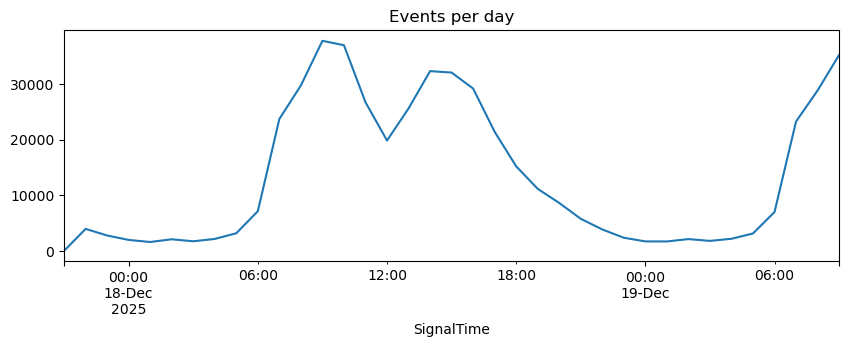

In [142]:
daily = left.set_index('SignalTime').resample('H').size()
daily.plot(title='Events per day', figsize=(10,3))
plt.show()

In [36]:
# test2
left1 = filtered_maindf2.sort_values(['UnitNumber', 'FlagChangeTime'])
right1 = combined_abff.sort_values(['UnitNumber', 'SignalTime'])


In [37]:
left1 = left1.dropna(subset=['FlagChangeTime', 'UnitNumber'])
right1 = right1.dropna(subset=['SignalTime', 'UnitNumber'])
left1 = left1.sort_values(['UnitNumber', 'FlagChangeTime'], kind='mergesort').reset_index(drop=True)
right1 = right1.sort_values(['UnitNumber', 'SignalTime'], kind='mergesort').reset_index(drop=True)

In [39]:
merged1 = pd.merge_asof(
    left1, 
    right1,
    left_on='FlagChangeTime',
    right_on='SignalTime',
    by='UnitNumber',
    direction='backward',
    allow_exact_matches=True,
    suffixes=( '_main','_abff')
                               )

ValueError: left keys must be sorted

#### merge

In [40]:
merged2 = pd.merge(
    left1,
    right1,
    on='UnitNumber',
    suffixes=('_main','_abff')
)

In [41]:
merged2.info()

unique_count = merged2['UnitNumber'].nunique()
print("Unique UnitNumber count:", unique_count)

counts = merged2['UnitNumber'].value_counts()
print(counts.head(10))   # top 20 most frequent UnitNumber values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219147 entries, 0 to 219146
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype                        
---  ------          --------------   -----                        
 0   UnitNumber      219147 non-null  object                       
 1   FlagChangeTime  219147 non-null  datetime64[ns, Asia/Shanghai]
 2   WaitReportTime  219147 non-null  datetime64[ns, Asia/Shanghai]
 3   date            219147 non-null  object                       
 4   abff            219147 non-null  int64                        
 5   opmode          219128 non-null  object                       
 6   floor           219129 non-null  float64                      
 7   Signal          219147 non-null  object                       
 8   SignalTime      219147 non-null  datetime64[ns, Asia/Shanghai]
 9   source          219147 non-null  object                       
dtypes: datetime64[ns, Asia/Shanghai](3), float64(1), int64(1), object(5)

In [42]:
# exclude the timestamp that out of the window time
merged_window = merged2[
    (merged2['SignalTime'] <= merged2['WaitReportTime']) &
    (merged2['SignalTime'] >= merged2['FlagChangeTime'])
].copy()

In [45]:
print("total records:", len(merged_window))

unique_count = merged_window['UnitNumber'].nunique()
print("Elevator count:", unique_count)

counts = merged_window['UnitNumber'].value_counts()
print(counts.head(10))   # top 10 most elevator that has more signal than others

total records: 19546
Elevator count: 425
UnitNumber
R2N0JU55    9048
R2N5K920    8553
R2N0CL60     592
R2N5N039     124
F8N0ZCS5     107
F8N0KUS9      32
D3NT2338      22
F8N0WXC7      20
F8N1PEB4      20
R2N7P426      17
Name: count, dtype: int64


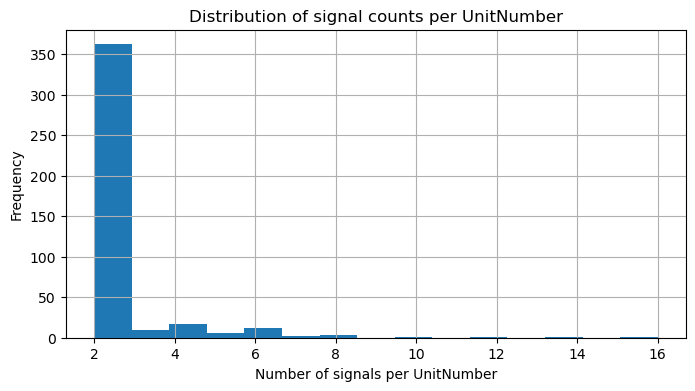

In [58]:
counts[10:].plot(kind='hist', bins=15, figsize=(8,4), title='Distribution of signal counts per UnitNumber')
plt.xlabel('Number of signals per UnitNumber')
plt.grid(True)
plt.show()

### Time Delta Calculation

In [59]:
# convert signal column to 0 and 1
merged_window['Signal'] = merged_window['Signal'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# interval from yes 1/2 to 0 for each UnitNumber
g = merged_window.groupby('UnitNumber', sort=False)

prev_signal = g['Signal'].shift(1)
prev_time   = g['SignalTime'].shift(1)


Time internal from Yes to 0 within each UnitNumber

In [ ]:
# calculate interval from 1/2 to 0
merged_window['1/2 to zero interval'] = merged_window['SignalTime'].sub(prev_time).where(
    (prev_signal == 1) & (merged_window['Signal'] == 0))

When Signal is 0, time lasts until WaitReportTime

In [63]:
merged_window["zero_to_waitReport_interval"] = (merged_window['WaitReportTime'] - merged_window['SignalTime']).where(merged_window['Signal'] == 0)

In [64]:
# convert both columns to seconds
merged_window['1/2 to zero interval_SC'] = merged_window['1/2 to zero interval'].dt.total_seconds()
merged_window["zero_to_waitReport_interval_SC"] = merged_window["zero_to_waitReport_interval"].dt.total_seconds()

Same floor check and exclusion

In [66]:
floor_counts = merged_window.groupby("UnitNumber")['floor'].nunique()
valid_units = floor_counts[floor_counts == 1].index

merged_window_same_floor = merged_window[merged_window['UnitNumber'].isin(valid_units)].copy()

In [67]:
print("total records:", len(merged_window_same_floor))

unique_count = merged_window_same_floor['UnitNumber'].nunique()
print("Elevator count:", unique_count)

counts = merged_window_same_floor['UnitNumber'].value_counts()
print(counts.head(10))   # top 10 most elevator that has more signal than others

total records: 18415
Elevator count: 315
UnitNumber
R2N0JU55    9048
R2N5K920    8553
R2N5N039     124
D3NT2338      22
R2N0A707      12
F8N0FUH9       6
F8N0XCP7       6
R2N1Y174       6
F8N0XBJ1       5
F8S58B07       5
Name: count, dtype: int64
